# Librerias

In [ ]:
!pip install Biopython
from Bio import ExPASy
from Bio import SeqIO
from Bio import SwissProt
import gzip
from collections import Counter, defaultdict 
import matplotlib.pyplot as plt
 
from pprint import pprint
import pandas as pd
import numpy as np

# Objetivo 1

In [ ]:
#1a)

UniProtID = "O23729"
with ExPASy.get_sprot_raw(UniProtID) as handle:
    seq_record = SeqIO.read(handle, "swiss")
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print(seq_record.seq)
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"])

#%%



O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE')
MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELKEKFKRMCDKSMIKKRYMYLTEEILKENPNICAFMAPSLDARQDIVVTEVPKLAKEAAVRAIKEWGHPKSRITHLIFCTTSGIDMPGADYQLTRLLGLRPSVNRFMLYQQGCFAGGTVLRLAKDLAENNAGARVLVVCSEITAVTFRGPSESHLDSLVGQALFGDGAAAIIVGSDPDSATERPLFQLVSASQTILPESEGAIDGHLREIGLTFHLLKDVPGLISKNIQKCLLDAFKPLGVHDWNSIFWIAHPGGPAILDQVEIKLGLKAEKLAASRNVLAEYGNMSSACVLFILDEMRRRSAEAGQATTGEGLEWGVLFGFGPGLTVETIVLRSVPIAGAE
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


In [ ]:
#1a)
print('Ingrese el ID de la proteína a analizar:')
ID = input()

def Muestra_datos(ID):
    UniProtID = ID
    with ExPASy.get_sprot_raw(UniProtID) as handle:
        seq_record = SeqIO.read(handle, "swiss")
    print(seq_record.id)
    print(seq_record.name)
    print(seq_record.description)
    print(repr(seq_record.seq))
    
    print("Length %i" % len(seq_record))
    print(seq_record.annotations["keywords"])
    return seq_record

Muestra_datos(ID)

Ingrese el ID de la proteína a analizar:
O23729
O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE')
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


SeqRecord(seq=Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE'), id='O23729', name='CHS3_BROFI', description='RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;', dbxrefs=['EMBL:AF007097', 'SMR:O23729', 'PRIDE:O23729', 'UniPathway:UPA00154', 'GO:GO:0016210', 'GO:GO:0009813', 'Gene3D:3.40.47.10', 'InterPro:IPR012328', 'InterPro:IPR018088', 'InterPro:IPR001099', 'InterPro:IPR011141', 'InterPro:IPR016039', 'PANTHER:PTHR11877', 'Pfam:PF02797', 'Pfam:PF00195', 'PIRSF:PIRSF000451', 'SUPFAM:SSF53901', 'PROSITE:PS00441'])

In [ ]:
#%% Busque el ID de la mioglobina humana
seq2_record = Muestra_datos("P02144")

#%%
print("La secuencia de la mioglobina humana es {}".format(seq2_record.seq))

P02144
MYG_HUMAN
RecName: Full=Myoglobin;
Seq('MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSED...FQG')
Length 154
['3D-structure', 'Direct protein sequencing', 'Heme', 'Iron', 'Metal-binding', 'Muscle protein', 'Oxygen transport', 'Phosphoprotein', 'Polymorphism', 'Reference proteome', 'Transport']
La secuencia de la mioglobina humana es MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG


In [ ]:
#1b)
handle = open("mioglobina_humana.txt")
from Bio import SwissProt
record = SwissProt.read(handle)
handle.close()


FileNotFoundError: ignored

In [ ]:
print(record.description)
print("Referencias:")
for ref in record.references:
    print("authors:", ref.authors)
    print("title:", ref.title)
print("Organismo: {}".format(record.organism))
print(record.organism_classification)

NameError: ignored

In [ ]:
print(record.sequence_length)
print(record.gene_name)
print(record.cross_references)
print(type(record.cross_references))
print(record.keywords)


154
Name=MB;
[('EMBL', 'X00371', 'CAA25109.1', '-', 'Genomic_DNA'), ('EMBL', 'X00372', 'CAA25109.1', 'JOINED', 'Genomic_DNA'), ('EMBL', 'X00373', 'CAA25109.1', 'JOINED', 'Genomic_DNA'), ('EMBL', 'M14603', 'AAA59595.1', '-', 'Genomic_DNA'), ('EMBL', 'M10090', 'AAA59595.1', 'JOINED', 'Genomic_DNA'), ('EMBL', 'M14602', 'AAA59595.1', 'JOINED', 'Genomic_DNA'), ('EMBL', 'CR456516', 'CAG30402.1', '-', 'mRNA'), ('EMBL', 'CR541949', 'CAG46747.1', '-', 'mRNA'), ('EMBL', 'DQ003030', 'AAX84516.1', '-', 'Genomic_DNA'), ('EMBL', 'AL022334', 'CAI21837.1', '-', 'Genomic_DNA'), ('EMBL', 'AL049747', 'CAI21837.1', 'JOINED', 'Genomic_DNA'), ('EMBL', 'BC014547', 'AAH14547.1', '-', 'mRNA'), ('CCDS', 'CCDS13917.1', '-'), ('PIR', 'I53991', 'MYHU'), ('RefSeq', 'NP_005359.1', 'NM_005368.2'), ('RefSeq', 'NP_976311.1', 'NM_203377.1'), ('RefSeq', 'NP_976312.1', 'NM_203378.1'), ('RefSeq', 'XP_005261662.1', 'XM_005261605.2'), ('PDB', '3RGK', 'X-ray', '1.65 A', 'A=2-154'), ('PDBsum', '3RGK', '-'), ('SMR', 'P02144', '

In [ ]:
#Ahora trabajamos con la lista propuesta de proteinas
Archivo_de_prots = gzip.open("uniprot-myoglobin+AND+reviewed_yes.txt.gz", "rt")

mioglobinas=[record.description for record in SwissProt.parse(Archivo_de_prots)]
Archivo_de_prots.close()
#Cuántos registros hay?
print(len(mioglobinas))
#Veamos algunos ejemplos
mioglobinas[:5]
Archivo_de_prots = gzip.open("uniprot-myoglobin+AND+reviewed_yes.txt.gz", "rt")
record_mioglobinas = [record for record in SwissProt.parse(Archivo_de_prots)]
Archivo_de_prots.close()

FileNotFoundError: ignored

In [ ]:
dir(record_mioglobinas[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'accessions',
 'annotation_update',
 'comments',
 'created',
 'cross_references',
 'data_class',
 'description',
 'entry_name',
 'features',
 'gene_name',
 'host_organism',
 'host_taxonomy_id',
 'keywords',
 'molecule_type',
 'organelle',
 'organism',
 'organism_classification',
 'protein_existence',
 'references',
 'seqinfo',
 'sequence',
 'sequence_length',
 'sequence_update',
 'taxonomy_id']

In [ ]:
Archivo_de_prots = gzip.open("uniprot-myoglobin+AND+reviewed_yes.txt.gz", "rt")
diccionario_largos = dict(Counter([record.sequence_length for record in SwissProt.parse(Archivo_de_prots)]))
Archivo_de_prots.close()
diccionario_largos



{22: 1,
 45: 1,
 96: 1,
 109: 1,
 117: 1,
 118: 1,
 121: 2,
 132: 1,
 141: 1,
 143: 1,
 144: 1,
 145: 2,
 146: 7,
 147: 21,
 148: 1,
 149: 5,
 151: 3,
 153: 2,
 154: 102,
 157: 1,
 174: 1,
 261: 1,
 378: 2,
 390: 2,
 395: 2,
 432: 1,
 489: 1,
 500: 1,
 513: 1,
 719: 1,
 733: 1,
 890: 1,
 3623: 1,
 4652: 1,
 4655: 1,
 4660: 2}

In [ ]:
#1c)
handle = gzip.open("uniprot-myoglobin+AND+reviewed_yes.txt.gz", "rt")
#Cargamos los linajes de los organismos a los cuales pertenecen las proteinas en cuestión
linages = [record.organism_classification[0] for record in SwissProt.parse(handle)]
handle.close()

In [ ]:
linages.count("Bacteria")

5

In [ ]:
from collections import Counter, OrderedDict
handle = open("Mbs.txt")
linages = [record.organism_classification for record in SwissProt.parse(handle)]
#print(linages)
handle.close()
def common_linage(linages, alpha=0.8):
    
    
 
    taxons = [taxon for record in linages for taxon in record]
    
    counts = Counter(taxons)
    print(counts)
    
    taxons = OrderedDict.fromkeys(taxons)
    
    
    common_linage = [taxon for taxon in taxons if counts[taxon] >= alpha*len(linages)]

    
    return common_linage
result = common_linage(linages, alpha=1)
print(result)
print("-"*100)
result = common_linage(linages, alpha=0.8)
print(result)
print("-"*100)
result = common_linage(linages, alpha=0.6)
print(result)
print("-"*100)
result = common_linage(linages, alpha=0.4)
print(result)
print("-"*100)
result = common_linage(linages, alpha=0) #Dame todas
print(result)

Counter({'Eukaryota': 170, 'Metazoa': 165, 'Chordata': 141, 'Craniata': 141, 'Vertebrata': 141, 'Euteleostomi': 137, 'Mammalia': 101, 'Eutheria': 97, 'Laurasiatheria': 49, 'Euarchontoglires': 45, 'Cetartiodactyla': 34, 'Primates': 25, 'Cetacea': 24, 'Haplorrhini': 21, 'Glires': 19, 'Actinopterygii': 19, 'Neopterygii': 19, 'Teleostei': 19, 'Lophotrochozoa': 18, 'Odontoceti': 18, 'Neoteleostei': 17, 'Acanthomorphata': 17, 'Catarrhini': 16, 'Rodentia': 16, 'Mollusca': 16, 'Archelosauria': 14, 'Gastropoda': 13, 'Archosauria': 11, 'Carnivora': 11, 'Caniformia': 11, 'Hominidae': 10, 'Dinosauria': 10, 'Saurischia': 10, 'Theropoda': 10, 'Coelurosauria': 10, 'Aves': 10, 'Pelagiaria': 9, 'Scombriformes': 9, 'Scombridae': 9, 'Myomorpha': 8, 'Muroidea': 8, 'Ruminantia': 8, 'Pecora': 8, 'Neognathae': 8, 'Homo': 7, 'Eupercaria': 7, 'Delphinidae': 7, 'Muridae': 6, 'Murinae': 6, 'Mus': 6, 'Bovidae': 6, 'Heterobranchia': 6, 'Euthyneura': 6, 'Hystricomorpha': 6, 'Perciformes': 6, 'Notothenioidei': 6, 'M

# Nueva sección

In [ ]:
#1d) Atributos de la Secuencia Proteica

handle = open("Mbs.txt")


features=[]
for record in SwissProt.parse(handle):
    for i in record.features:
        features.append(i)
print(features)
handle.close()




[FeatureTable(FeatureLocation(ExactPosition(0), ExactPosition(1)), type='INIT_MET'), FeatureTable(FeatureLocation(ExactPosition(1), ExactPosition(154)), type='CHAIN', id='PRO_0000053303'), FeatureTable(FeatureLocation(ExactPosition(64), ExactPosition(65)), type='METAL'), FeatureTable(FeatureLocation(ExactPosition(93), ExactPosition(94)), type='METAL'), FeatureTable(FeatureLocation(ExactPosition(3), ExactPosition(4)), type='MOD_RES'), FeatureTable(FeatureLocation(ExactPosition(67), ExactPosition(68)), type='MOD_RES'), FeatureTable(FeatureLocation(ExactPosition(54), ExactPosition(55)), type='VARIANT', id='VAR_003180'), FeatureTable(FeatureLocation(ExactPosition(133), ExactPosition(134)), type='VARIANT', id='VAR_003181'), FeatureTable(FeatureLocation(ExactPosition(139), ExactPosition(140)), type='VARIANT', id='VAR_003182'), FeatureTable(FeatureLocation(ExactPosition(139), ExactPosition(140)), type='VARIANT', id='VAR_003183'), FeatureTable(FeatureLocation(ExactPosition(105), ExactPosition(

In [ ]:
handle = open("Mbs.txt")


seqs=[]

for record in SwissProt.parse(handle):
    seqs.append(record.sequence)
print(seqs)
handle.close()

['MGLSDGEWQLVLNVWGKVEADIPGHGQEVLIRLFKGHPETLEKFDKFKHLKSEDEMKASEDLKKHGATVLTALGGILKKKGHHEAEIKPLAQSHATKHKIPVKYLEFISECIIQVLQSKHPGDFGADAQGAMNKALELFRKDMASNYKELGFQG', 'MGLSDGEWQLVLNVWGKVEADLAGHGQEVLIGLFKTHPETLDKFDKFKNLKSEEDMKGSEDLKKHGCTVLTALGTILKKKGQHAAEIQPLAQSHATKHKIPVKYLEFISEIIIEVLKKRHSGDFGADAQGAMSKALELFRNDIAAKYKELGFQG', 'MGLSDGEWQMVLNIWGKVEGDLAGHGQEVLISLFKAHPETLEKFDKFKNLKSEEEMKSSEDLKKHGCTVLTALGTILKKKGQHAAEIQPLAQSHATKHKIPVKYLEFISEVIIQVLKKRYSGDFGADAQGAMSKALELFRNDIAAKYKELGFQG', 'MGLSDGEWQLVLNAWGKVEADVAGHGQEVLIRLFTGHPETLEKFDKFKHLKTEAEMKASEDLKKHGNTVLTALGGILKKKGHHEAEVKHLAESHANKHKIPVKYLEFISDAIIHVLHAKHPSDFGADAQAAMSKALELFRNDMAAQYKVLGFHG', 'MGLSDGEWQLVLNAWGKVETDVAGHGQEVLIRLFTGHPETLEKFDKFKHLKTEAEMKASEDLKKHGNTVLTALGGILKKKGHHEAEVKHLAESHANKHKIPVKYLEFISDAIIHVLHDKHPSDFGADAQAAMSKALELFRNEMAAQYKVLGFHG', 'MADHDLVLKCWGAVEADYAANGGEVLNRLFKEYPDTLKLFPKFSGISQGDLAGSPAVAAHGATVLKKLGELLKAKGDHAALLKPLANTHANIHKVALNNFRLITEVLVKVMAEKAGLDAAGQGALRRVMDAVIGDIDGYYKEIGFAG', 'MSLSAAEADLAGKSWAPVFANKDANGDAFLVALFEKFPDSANFFADFKGKSVADIKA

In [ ]:
def feature_dict(features):
    struct_dict = defaultdict(list)
    post_dict = defaultdict(list)
    variant_dict = defaultdict(list)
    motivos_estructurales = ["HELIX", "SHEET", "TURN", "LOOP", "ZN_FING"]
    modificaciones_post = ["MOD_RES"]
    variants = ["VARIANT"]
    for feature in features:
        if feature.type in motivos_estructurales:
            post_dict[feature.type].append([feature.location.start.position, feature.location.end.position])
        elif feature.type in modificaciones_post:
            struct_dict[feature.type].append([feature.location.start.position, feature.location.end.position]) 
        elif feature.type in variants :
            variant_dict[feature.type].append([feature.location.start.position, feature.location.end.position, feature.qualifiers]) 
            
    return post_dict, struct_dict, variant_dict
post_dict, struct_dict, variant_dict = feature_dict(features)
print("diccionario modificaciones post-traduccionales")
print(post_dict)
print("-"*100)
print("motivos structurales")
print(struct_dict)
print("-"*100)
print("variantes")
print(variant_dict)

diccionario modificaciones post-traduccionales
defaultdict(<class 'list'>, {'HELIX': [[4, 18], [18, 21], [21, 36], [37, 43], [44, 47], [52, 57], [59, 77], [83, 96], [101, 119], [125, 149], [4, 20], [21, 36], [37, 43], [51, 56], [60, 78], [81, 98], [102, 118], [126, 144], [4, 15], [15, 18], [21, 39], [40, 46], [47, 50], [57, 60], [61, 79], [84, 97], [105, 123], [126, 145], [2, 6], [9, 25], [30, 34], [38, 53], [64, 69], [75, 92], [96, 108], [110, 114], [4, 18], [18, 21], [21, 36], [37, 42], [52, 57], [59, 77], [83, 96], [101, 119], [120, 123], [125, 149], [4, 19], [21, 36], [37, 41], [44, 47], [52, 58], [59, 96], [101, 119], [125, 149], [4, 19], [21, 36], [37, 41], [44, 47], [52, 58], [59, 77], [83, 95], [101, 119], [125, 149], [3, 19], [21, 36], [38, 43], [52, 57], [59, 78], [86, 96], [103, 119], [125, 150], [2, 9], [11, 15], [17, 32], [33, 39], [47, 50], [54, 73], [78, 91], [97, 114], [118, 143], [4, 18], [18, 21], [21, 36], [37, 41], [44, 47], [52, 57], [59, 77], [83, 96], [101, 119],

In [ ]:
#Objetivo 2: Parsear gnomAD y ClinVar
#Ejercicio 2a
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2954d2ba8>,
      dtype=object)

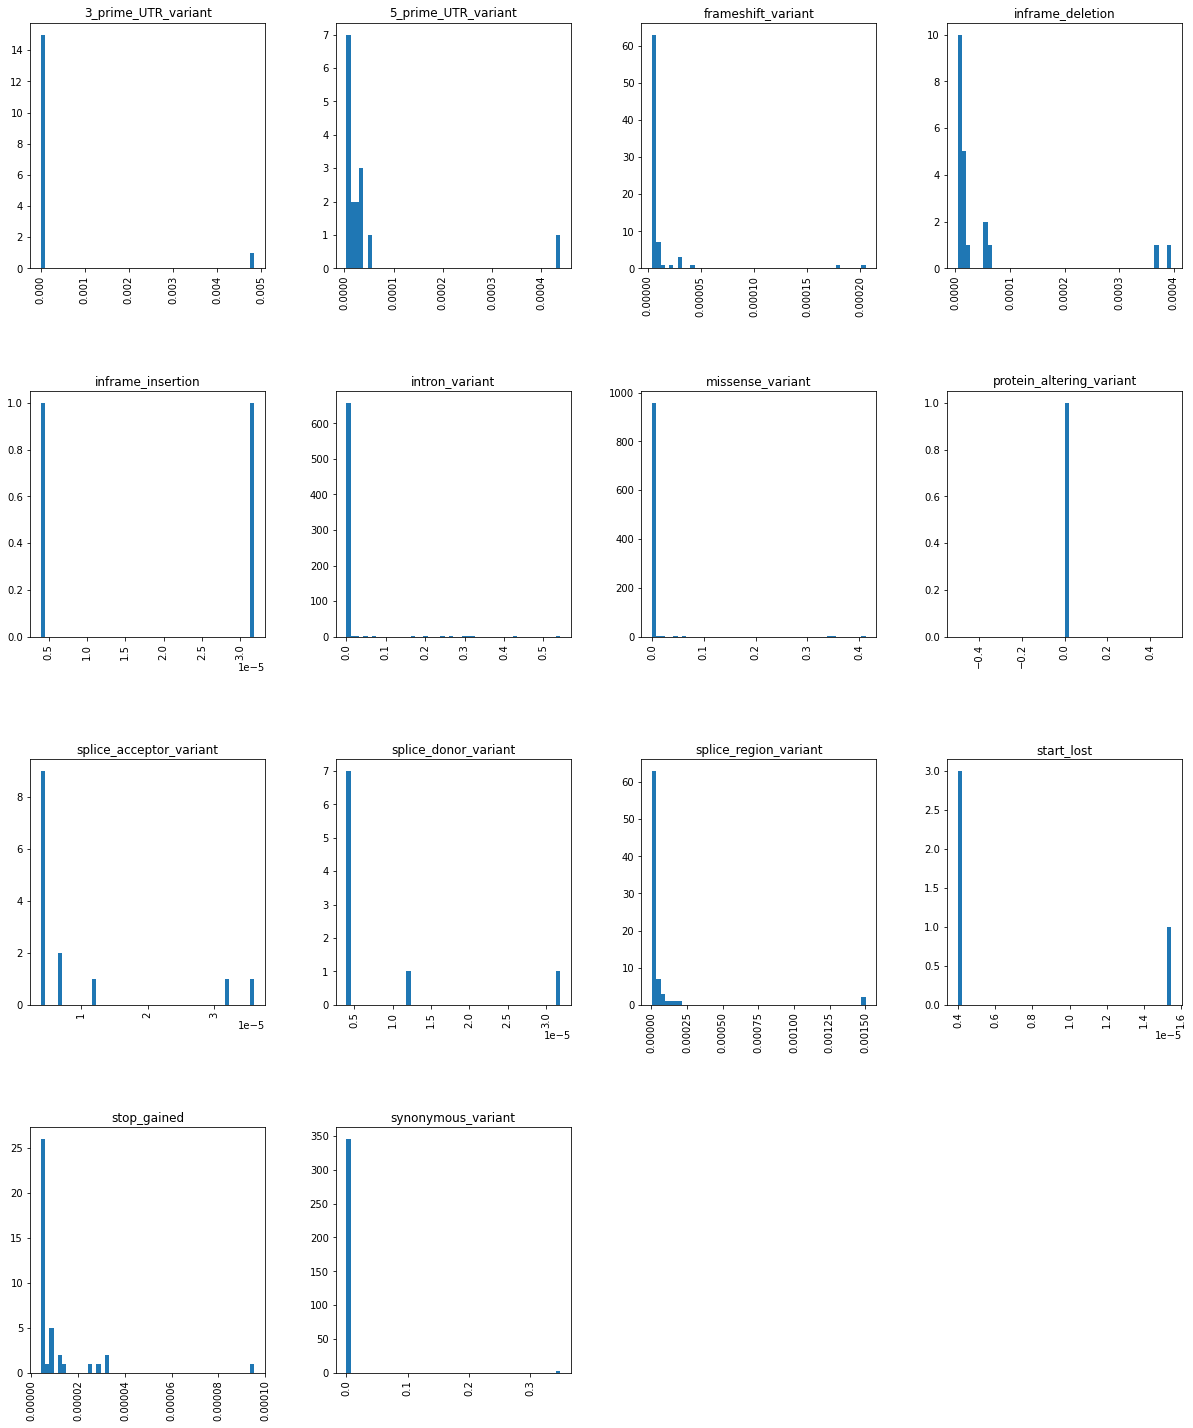

In [ ]:
BRCA1_gnomAD = pd.read_csv('BRCA1_gnomad.csv')
BRCA1_clinvar = pd.read_csv('BRCA1_clinvar.txt', sep= '\t')
#BRCA1_gnomAD.columns, BRCA1_clinvar.columns
BRCA1_gnomAD_filt= BRCA1_gnomAD[['Chromosome', 'Position', 'rsID', 'Reference', 'Alternate', 'Transcript Consequence', 'Annotation', 'Allele Count', 'Allele Number', 'Allele Frequency', 'Homozygote Count']]
BRCA1_gnomAD_filt["AF"]= BRCA1_gnomAD_filt['Allele Count']/BRCA1_gnomAD_filt['Allele Number']
#BRCA1_gnomAD_filt
BRCA1_gnomAD_filt['Annotation'].value_counts()
BRCA1_gnomAD_filt['Allele Frequency'].hist(by=BRCA1_gnomAD_filt['Annotation'], bins=50, figsize=(20,25))


El promedio de diferencia entre AF y Allele Frequency es 1.13e-19.
La mayor diferencia encontrada fue de 5.55e-17.
Estas diferencias son muy bajas y probablemente se deban a cuestiones numericas.

Cuantas caen en exon e intron?
1492 en exones y 775 en intrones


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


'Igual está subestimada la cantidad de modificaciones en intrones, porque descargamos el csv y gnomad nos dice esto: A gene search in the new browser will return variants in the CDS regions of the gene or within 75 base pairs of a CDS region. This behavior means that not all intronic or UTR variants will appear when doing a gene search or downloading the CSV tables, leading to fewer variants being displayed on the browser than what is present in the downloadable VCFs (which will contain all variants).'

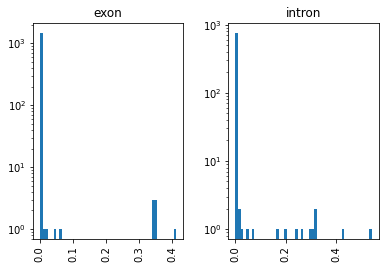

In [ ]:
#Comparacion entre AF y Allele Frequency
diff = BRCA1_gnomAD_filt["AF"] - BRCA1_gnomAD_filt['Allele Frequency']
print("El promedio de diferencia entre AF y Allele Frequency es {}.".format(round(abs(diff).mean(),21)))
print("La mayor diferencia encontrada fue de {}.".format(round(max(abs(diff)), 19)))
print("Estas diferencias son muy bajas y probablemente se deban a cuestiones numericas.")
print()
print("Cuantas caen en exon e intron?")

Intrones = ['splice_acceptor_variant', 'splice_region_variant', 'intron_variant', 'splice_donor_variant']
BRCA1_gnomAD_filt["IoE"] = ["intron" if i in Intrones else "exon" for i in BRCA1_gnomAD_filt['Annotation']]
cuantas_intron = sum([1 if i == "intron" else 0 for i in BRCA1_gnomAD_filt["IoE"]])
cuantas_exon = sum([1 if i == "exon" else 0 for i in BRCA1_gnomAD_filt["IoE"]])
print("{} en exones y {} en intrones".format(cuantas_exon, cuantas_intron))
fig, (ax1, ax2) = plt.subplots(1,2)

BRCA1_gnomAD_filt['Allele Frequency'].hist(ax = (ax1, ax2),by=BRCA1_gnomAD_filt['IoE'], bins=50)
ax1.set_yscale('log')
ax2.set_yscale('log')
"""Igual está subestimada la cantidad de modificaciones en intrones, porque descargamos el csv y gnomad nos dice esto: A gene search in the new browser will return variants in the CDS regions of the gene or within 75 base pairs of a CDS region. This behavior means that not all intronic or UTR variants will appear when doing a gene search or downloading the CSV tables, leading to fewer variants being displayed on the browser than what is present in the downloadable VCFs (which will contain all variants)."""


In [ ]:
#2b) Integrado de ambos registros
#Ejercicio 2b) A partir del dataframe combinado de Clinvar y gnomAD construya los histogramas de frecuencias para diferentes clasificaciones clínicas de las variantes. (Nota: para la frecuencia utilice escala logarítmica)
BRCA1_clinvar = pd.read_csv('BRCA1_clinvar.txt', sep= '\t')
BRCA1_clinvar.rename(columns={'dbSNP ID':'rsID'}, inplace=True)


BRCA1_clinvar = BRCA1_clinvar[BRCA1_clinvar.rsID.notnull()]

BRCA1_merged = pd.merge(BRCA1_gnomAD, BRCA1_clinvar, on='rsID')
BRCA1_merged = BRCA1_merged[['rsID','Chromosome','Position','Reference','Alternate','Protein change','Clinical significance (Last reviewed)','Condition(s)','Consequence', 'Allele Frequency']]
BRCA1_merged.sample(10)


,rsID,Chromosome,Position,Reference,Alternate,Protein change,Clinical significance (Last reviewed),Condition(s),Consequence,Allele Frequency
1912,rs765432756,17,41251817,T,C,NaN,"Likely benign(Last reviewed: Jun 29, 2017)",Hereditary cancer-predisposing syndrome|not sp...,p.Gln174Gln,0.000018
288,rs80356896,17,41215963,C,A,"E1694K, E1715K, E1647K, E590K","Uncertain significance(Last reviewed: Feb 26, ...",Hereditary breast and ovarian cancer syndrome|...,p.Glu1715Ter,0.000004
2062,rs8176128,17,41258450,A,T,NaN,"Benign(Last reviewed: Jan 12, 2015)","not specified|Breast-ovarian cancer, familial ...",c.212+23T>A,0.003347
1127,rs1401324575,17,41244673,T,C,"R959*, R912*","Pathogenic(Last reviewed: Mar 15, 2016)",not provided,p.Arg959Gly,0.000004
1102,rs876659025,17,41244606,G,A,"P981Q, P934Q","Uncertain significance(Last reviewed: Jul 15, ...",Hereditary breast and ovarian cancer syndrome|...,p.Pro981Leu,0.000004
615,rs765183110,17,41234544,C,T,"A1365P, A309P, A1412P","Uncertain significance(Last reviewed: Oct 19, ...",Hereditary breast and ovarian cancer syndrome,p.Ala1412Thr,0.000004
1951,rs45569832,17,41256103,G,A,NaN,"Uncertain significance(Last reviewed: Apr 3, 2...","Breast-ovarian cancer, familial 1",c.441+36C>T,0.000085
466,rs780870669,17,41226328,T,C,NaN,Conflicting interpretations of pathogenicity(L...,Hereditary cancer-predisposing syndrome|not sp...,c.4738+20A>G,0.000004
113,rs145758886,17,41201173,C,A,"V1791L, V1744L, V1812L, V687L","Uncertain significance(Last reviewed: Apr 29, ...","Breast-ovarian cancer, familial 1|Hereditary c...",p.Val1812Leu,0.000004
720,rs80357202,17,41243494,C,T,"E1352Q, E1305Q","Uncertain significance(Last reviewed: Jan 28, ...",Hereditary cancer-predisposing syndrome,p.Glu1352Lys,0.000024


In [ ]:
filas=[]
count=0
for i in list(BRCA1_merged["Clinical significance (Last reviewed)"]): 
    if i.startswith("Pathogenic"):
        filas.append(count)
    count=count+1
BRCA1_path=BRCA1_merged.loc[filas,:]
BRCA1_path

,rsID,Chromosome,Position,Reference,Alternate,Protein change,Clinical significance (Last reviewed),Condition(s),Consequence,Allele Frequency
22,rs397509295,17,41197746,G,C,"C1847*, C1800*, C1868*, C743*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1|Hereditary b...",p.Cys1868Trp,0.000004
30,rs80356873,17,41197751,G,T,"Q1846*, Q1867*, Q1799*, Q742*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1",p.Gln1867Lys,0.000032
41,rs80356942,17,41197781,C,T,"E1836*, E732*, E1857*, E1789*","Pathogenic(Last reviewed: Sep 8, 2016)","Breast-ovarian cancer, familial 1",p.Glu1857Lys,0.000008
47,rs41293465,17,41197784,G,A,"R1835*, R1856*, R1788*, R731*","Pathogenic(Last reviewed: Apr 22, 2016)",not provided|Breast and/or ovarian cancer|Brea...,p.Arg1856Ter,0.000012
49,rs80357268,17,41197790,C,T,"V1833M, V1854M, V729M, V1786M",Pathogenic/Likely pathogenic(Last reviewed: Fe...,"Breast-ovarian cancer, familial 1|Hereditary b...",p.Val1854Met,0.000004
...,...,...,...,...,...,...,...,...,...,...
2135,rs80358127,17,41267805,G,C,NaN,"Pathogenic(Last reviewed: Jun 18, 2019)",Hereditary cancer-predisposing syndrome|Heredi...,c.81-9C>G,0.000004
2174,rs80357410,17,41276044,ACT,A,C24R,Pathogenic/Likely pathogenic(Last reviewed: Ma...,Hereditary breast and ovarian cancer syndrome|...,p.Glu23ValfsTer17,0.000205
2175,rs397509309,17,41276045,C,T,C24fs,"Pathogenic(Last reviewed: Oct 18, 2016)","Breast-ovarian cancer, familial 1",p.Glu23Glu,0.000008
2176,rs80357783,17,41276047,C,G,E23fs,"Pathogenic(Last reviewed: Apr 22, 2016)",Hereditary cancer-predisposing syndrome|Neopla...,p.Glu23Gln,0.000004


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2923cb860>,
      dtype=object)

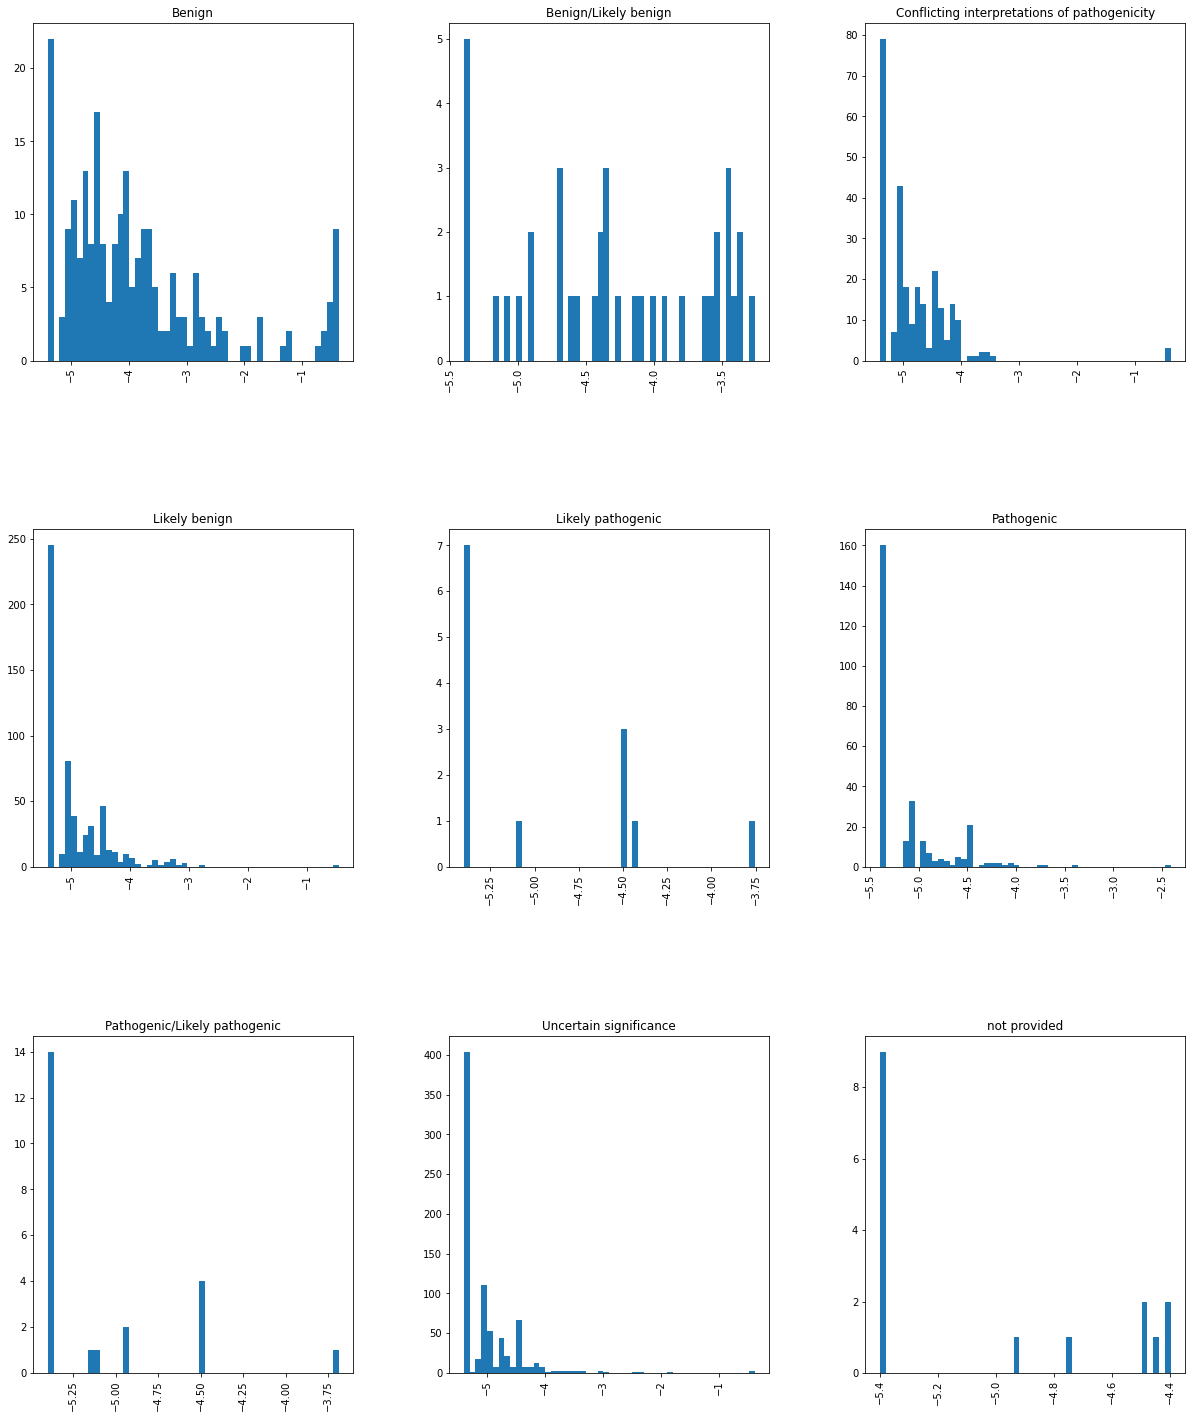

In [ ]:
##Usamos el archivo merge ya que no esta filtrada la columna 'Clinical significance (Last reviewed)' y nos sacamos de encima lo que esta dentro de los parentesis
BRCA1_merged['Clinical significance (Last reviewed)'] = BRCA1_merged['Clinical significance (Last reviewed)'].apply(lambda x: x.split('(')[0])
#BRCA1_merged['Clinical significance (Last reviewed)'].value_counts()
# se aplica el logaritmo a la columna Allele Frequency para realizar los histogramas.
BRCA1_merged['Allele Frequency log'] = np.log10(BRCA1_merged['Allele Frequency'])
#BRCA1_merged
BRCA1_merged['Allele Frequency log'].hist(by=BRCA1_merged['Clinical significance (Last reviewed)'], bins=50, figsize=(20,25))


In [ ]:
#2c) Mapeo de las variantes patogénicas a motivos estructurales


In [ ]:
# Ejercicio 2C

from Bio import ExPASy
from Bio import SeqIO

def Muestra_datos(ID):
    UniProtID = ID
    with ExPASy.get_sprot_raw(UniProtID) as handle:
        seq_record = SeqIO.read(handle, "swiss")
    #print(seq_record.id)
    #print(seq_record.name)
    #print(seq_record.description)
    #print(repr(seq_record.seq))
    
    #print("Length %i" % len(seq_record))
    #print(seq_record.annotations["keywords"])
    return seq_record
record = Muestra_datos('P38398')
features = []
for i in record.features:
    features.append(i)
# Armo lista de features (similar al ejercicio 1d)
# Uso el id del gen BRCA1 de UniProt que es P38398

import re
lista = []
for consecuencia in BRCA1_path['Consequence']:
    posicion = re.search(r'[a-z]\d+',consecuencia)
    if posicion != None:
        lista.append(int(posicion.group()[1:]))
    else:
        lista.append('NaN')
# Usando el módulo de expresiones regulares (re) busco dentro de la columna 'Consequence' la posición
# del aminoácido de la mutación. La agrego a una lista, si el registro no tiene posición lo paso como 'NaN'.

BRCA1_modificaciones = BRCA1_path
BRCA1_modificaciones['Posicion'] = lista
# Agrego la posición a la base de datos (ver que todo está en el mismo orden de la base de datos)

conteo = 0


lista3 = []
lista4 = []
est_y_mod = ['HELIX','LOOP','SHEET','TURN','ACT_SITE','VARIANT','CHAIN','CONFLICT','MOD_RES','INIT_MET','METAL','NON_TER','PROPEP','NP_BIND']
# Armo varias listas que después voy a usar, y todas las posibilidades de modificaciones y estructura 2aria
# (acá puse todo en la misma bolsa)

for pos in lista:
    for feature in features:
        if pos != 'NaN':
            if pos in range(feature.location.start.position,feature.location.end.position):
                if feature.type in est_y_mod:
                    if feature.type in lista3:
                        continue
                    lista3.append(feature.type)
    
                    
        else: 
            continue
# El programa va pasando por cada posición dentro de la lista. Para cada posición busca dentro de la lista features, de
# Uniprot si dicha posición se encuentra en dentro del rango de la secuencia correspondiente a alguna de las variantes
# posibles. Va agregando a la lista 3 cada una de las variantes que coinciden con la posición (sin repetir).

    modificaciones = ' '.join(lista3)
    lista4.append(modificaciones)
    modificaciones = ''
    lista3 = []
    conteo = conteo + 1
# En la lista 4 se van agregando en el mismo orden de la base de datos todas las modificaciones encontradas para
# la posición correspondiente.

BRCA1_modificaciones['Modificaciones y/o Estructura secundaria'] = lista4        

# Se agrega la lista 4 como columna a la base de datos con todas las modificaciones correspondientes encontradas.
BRCA1_modificaciones['Modificaciones y/o Estructura secundaria'].value_counts()
print(BRCA1_modificaciones.head(25))

            rsID  Chromosome  ...  Posicion Modificaciones y/o Estructura secundaria
22   rs397509295          17  ...      1868                                         
30    rs80356873          17  ...      1867                                         
41    rs80356942          17  ...      1857                            CHAIN VARIANT
47    rs41293465          17  ...      1856                            CHAIN VARIANT
49    rs80357268          17  ...      1854                            CHAIN VARIANT
51   rs768401297          17  ...      1850                      CHAIN VARIANT HELIX
57    rs80358048          17  ...       NaN                                         
70    rs80358009          17  ...       NaN                                         
72   rs397509284          17  ...      1836                      CHAIN VARIANT HELIX
74    rs80356962          17  ...      1836                      CHAIN VARIANT HELIX
78     rs1800751          17  ...      1833                      